In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Function to read all the datasets
def read_all(template,start,end):
    frames = [ pd.read_json(f).fillna(0) for f in [template.format(i) for i in range(start,end)] ]
    X = pd.concat(frames, ignore_index = True,sort = True)
    return X
template = "datasets/dataset_processed_v2/dataset_{:02}.json"
df = read_all(template,0,3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15185 entries, 0 to 15184
Columns: 167 entries, Ak47_ct to t_leads
dtypes: float64(1), int64(159), object(7)
memory usage: 19.3+ MB


In [4]:
df.head()

Ak47_ct  Ak47_t  Aug_ct  Aug_t  Awp_ct  Awp_t  Bizon_ct  Bizon_t  C4_ct  \
0        0       0       0      0       0      0         0        0      0   
1        0       0       0      0       0      0         0        0      0   
2        0       0       0      0       0      0         0        0      0   
3        0       0       0      0       0      0         0        0      0   
4        0       0       0      0       0      0         0        0      0   

   C4_t  Cz75Auto_ct  Cz75Auto_t  Deagle_ct  Deagle_t  DecoyGrenade_ct  \
0     1            0           0          0         0                0   
1     1            0           0          0         0                0   
2     1            0           0          0         0                0   
3     1            0           0          0         0                0   
4     1            0           0          0         0                0   

   DecoyGrenade_t  Elite_ct  Elite_t  Famas_ct  Famas_t  FiveSeven_ct  \
0               0         0        0         0        0             0   
1               0         0        0         0        0             0   
2               0         0        0         0        0             0   
3               0         0        0         0        0             0   
4               0         0        0         0        0             0   

   FiveSeven_t  Flashbang_ct  Flashbang_t  G3sg1_ct  G3sg1_t  GalilAr_ct  \
0            0             0            0         0        0           0   
1            0             1            2         0        0           0   
2            0             1            2         0        0           0   
3            0             0            0         0        0           0   
4            0             0            0         0        0           0   

   GalilAr_t  Glock_ct  Glock_t  HeGrenade_ct  HeGrenade_t  \
0          0         0        5             0            0   
1          0         0        5             0            0   
2          0         0        4             0            0   
3          0         0        3             0            0   
4          0         0        5             0            0   

   IncendiaryGrenade_ct  IncendiaryGrenade_t  Knife_ct  Knife_t  M249_ct  \
0                     0                    0         0        0        0   
1                     0                    0         0        0        0   
2                     0                    0         0        0        0   
3                     0                    0         0        0        0   
4                     0                    0         0        0        0   

   M249_t  M4a1S_ct  M4a1S_t  M4a4_ct  M4a4_t  Mac10_ct  Mac10_t  Mag7_ct  \
0       0         0        0        0       0         0        0        0   
1       0         0        0        0       0         0        0        0   
2       0         0        0        0       0         0        0        0   
3       0         0        0        0       0         0        0        0   
4       0         0        0        0       0         0        0        0   

   Mag7_t  MolotovGrenade_ct  MolotovGrenade_t  Mp5sd_ct  Mp5sd_t  Mp7_ct  \
0       0                  0                 0         0        0       0   
1       0                  0                 0         0        0       0   
2       0                  0                 0         0        0       0   
3       0                  0                 0         0        0       0   
4       0                  0                 0         0        0       0   

   Mp7_t  Mp9_ct  Mp9_t  Negev_ct  Negev_t  Nova_ct  Nova_t  P2000_ct  \
0      0       0      0         0        0        0       0         1   
1      0       0      0         0        0        0       0         1   
2      0       0      0         0        0        0       0         0   
3      0       0      0         0        0        0       0         0   
4      0       0      0         0        0        0       0         1   

In [5]:
# Check for missing values
missing = df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
if len(missing)>0: missing.plot.bar()
else: print("No misssing values!")

No misssing values!


In [7]:
colwep = ['Ak47_ct', 'Ak47_t', 'Aug_ct', 'Aug_t', 'Awp_ct', 'Awp_t', 'C4_t', 'Cz75Auto_ct',\
          'Cz75Auto_t', 'Deagle_ct', 'Deagle_t', 'DecoyGrenade_ct', 'DecoyGrenade_t', 'Flashbang_ct',\
          'Flashbang_t', 'Glock_ct', 'Glock_t', 'HeGrenade_ct', 'HeGrenade_t', 'M4a4_ct', 'M4a4_t',\
          'IncendiaryGrenade_ct', 'IncendiaryGrenade_t', 'Mp9_ct', 'Mp9_t', 'P2000_ct',\
          'P2000_t', 'P250_ct', 'P250_t', 'Sg553_ct', 'Sg553_t', 'SmokeGrenade_ct', 'SmokeGrenade_t',\
          'UspS_ct', 'UspS_t','MolotovGrenade_ct', 'MolotovGrenade_t']

colpla = ['alive_players_ct', 'alive_players_t', 'armor_ct1', 'armor_ct2',\
          'armor_ct3', 'armor_ct4', 'armor_ct5', 'armor_ct',\
          'armor_t1', 'armor_t2', 'armor_t3', 'armor_t4',\
          'armor_t5', 'armor_t','defuse_kit_ct1', 'defuse_kit_ct2',\
          'defuse_kit_ct3', 'defuse_kit_ct4', 'defuse_kit_ct5','defuse_kit_ct', \
          'has_helmet_ct1', 'has_helmet_ct2', 'has_helmet_ct3', 'has_helmet_ct4', 'has_helmet_ct5', \
          'has_helmet_ct','has_helmet_t1', 'has_helmet_t2', 'has_helmet_t3', 'has_helmet_t4',\
          'has_helmet_t5','has_helmet_t', 'health_ct1', 'health_ct2', \
          'health_ct3', 'health_ct4', 'health_ct5','health_ct',\
          'health_t1', 'health_t2', 'health_t3', 'health_t4',\
          'health_t5','health_t','money_ct1', 'money_ct2',\
          'money_ct3', 'money_ct4', 'money_ct5', \
          'money_ct', 'money_t1', 'money_t2', 'money_t3', \
          'money_t4', 'money_t5', 'money_t']

colsta = ['current_score_ct', 'current_score_t','t_leads','round_status_BombPlanted',\
          'round_status_FreezeTime', 'round_status_Normal', 'round_status_time_left']

colmap = ['map_de_dust2', 'map_de_inferno', 'map_de_mirage', 'map_de_nuke', 'map_de_overpass',\
          'map_de_train', 'map_de_vertigo','map_de_cache']


# cols = colpla+colmap+colwep
cols = colpla+colmap+colwep+colsta

imp_cols = ['alive_players_ct', 'alive_players_t', 'armor_ct1', 'armor_ct2',\
            'armor_ct3', 'armor_ct4', 'armor_ct5', 'armor_ct',\
            'armor_t1', 'armor_t2', 'armor_t3', 'armor_t4',\
            'armor_t5', 'armor_t', 'defuse_kit_ct1', 'defuse_kit_ct2',\
            'defuse_kit_ct3', 'defuse_kit_ct4', 'defuse_kit_ct5', 'defuse_kit_ct', 'has_helmet_ct1',\
            'has_helmet_ct2', 'has_helmet_ct3', 'has_helmet_ct4', 'has_helmet_ct5', 'has_helmet_ct',\
            'has_helmet_t1', 'has_helmet_t2', 'has_helmet_t3', 'has_helmet_t4', 'has_helmet_t5',\
            'has_helmet_t', 'health_ct1', 'health_ct2', 'health_ct3',\
            'health_ct4', 'health_ct5', 'health_ct', 'health_t1',\
            'health_t2', 'health_t3', 'health_t4', 'health_t5',\
            'health_t', 'money_ct1', 'money_ct2', 'money_ct3',\
            'money_ct4', 'money_ct5', 'money_ct', 'money_t1',\
            'money_t2', 'money_t3', 'money_t4', 'money_t5',\
            'money_t', 'map_de_dust2', 'map_de_inferno', 'map_de_mirage', 'map_de_nuke',\
            'map_de_overpass', 'map_de_train', 'map_de_vertigo', 'Ak47_ct', 'Ak47_t', 'Aug_ct',\
            'Awp_ct', 'Awp_t', 'C4_t', 'Cz75Auto_ct', 'Deagle_ct', 'Deagle_t', 'Flashbang_ct',\
            'Flashbang_t', 'Glock_t', 'HeGrenade_ct', 'HeGrenade_t', 'M4a4_ct',\
            'IncendiaryGrenade_ct', 'IncendiaryGrenade_t', 'Mp9_ct', 'P2000_ct',\
            'P250_ct', 'P250_t', 'Sg553_ct', 'Sg553_t', 'SmokeGrenade_ct', 'SmokeGrenade_t',\
            'UspS_ct','MolotovGrenade_ct', 'MolotovGrenade_t']
non_imp_cols = [ 'Aug_t', 'C4_t', 'Cz75Auto_t',\
                'DecoyGrenade_ct', 'DecoyGrenade_t', 'Glock_ct', 'M4a4_t', 'IncendiaryGrenade_t',\
                'Mp9_ct', 'Mp9_t', 'P2000_t', 'UspS_t', 'MolotovGrenade_ct',\
                'round_status_FreezeTime']
# for col in non_imp_cols:
#     cols.remove(col)
# cols = imp_cols
cols = cols+['round_winner_t']
df_main = df[cols]

In [8]:
df_main.shape

(15185, 109)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


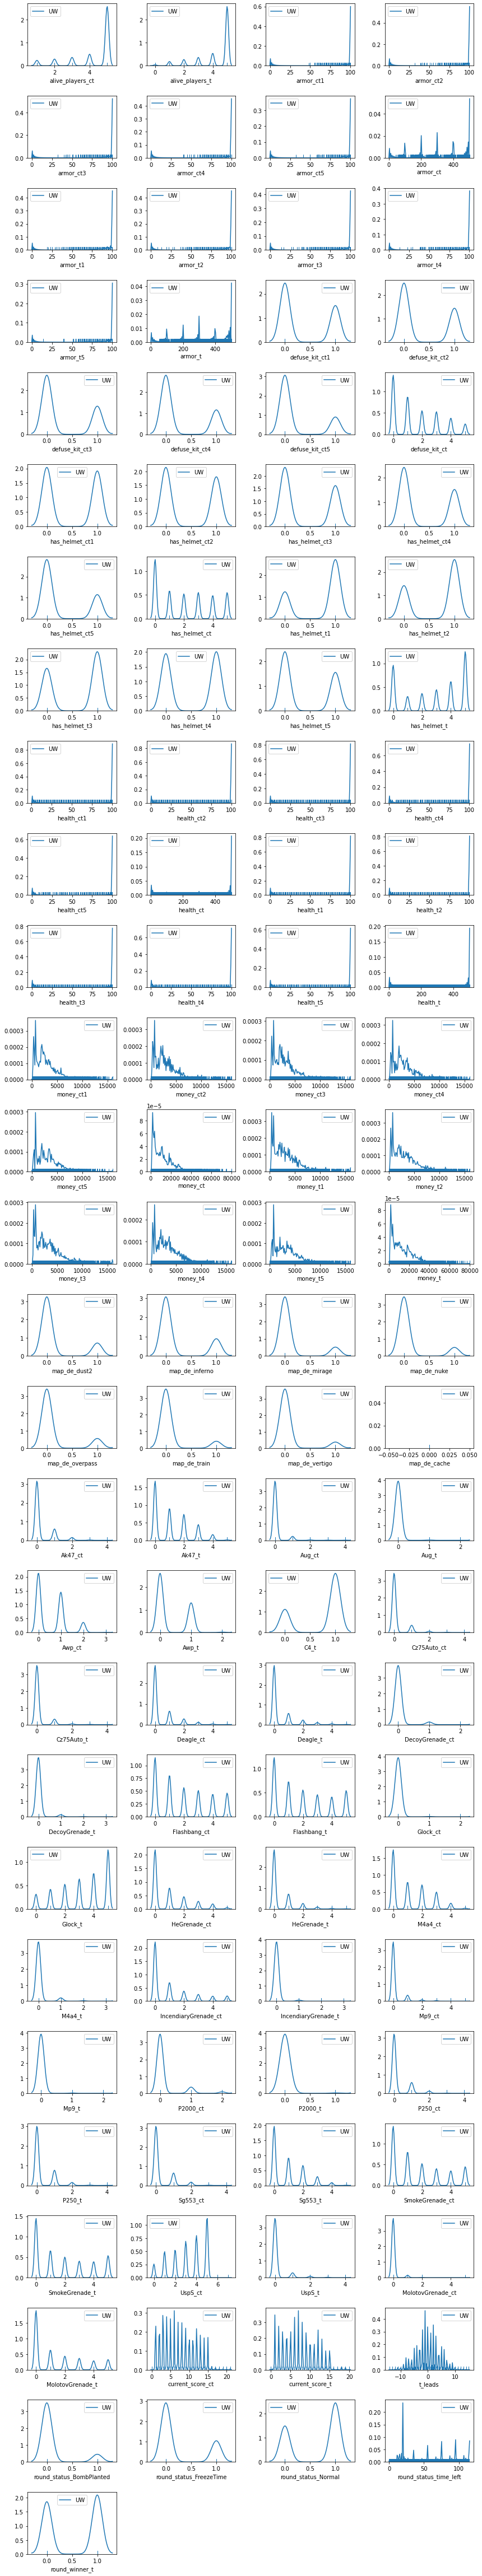

In [9]:
# Distribution of data
fig = plt.figure(figsize=(12,64))
for i in range(len(df_main.columns)):
    fig.add_subplot(28,4,i+1)
    sns.distplot(df_main.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(df_main.columns[i])
plt.tight_layout()
plt.show()

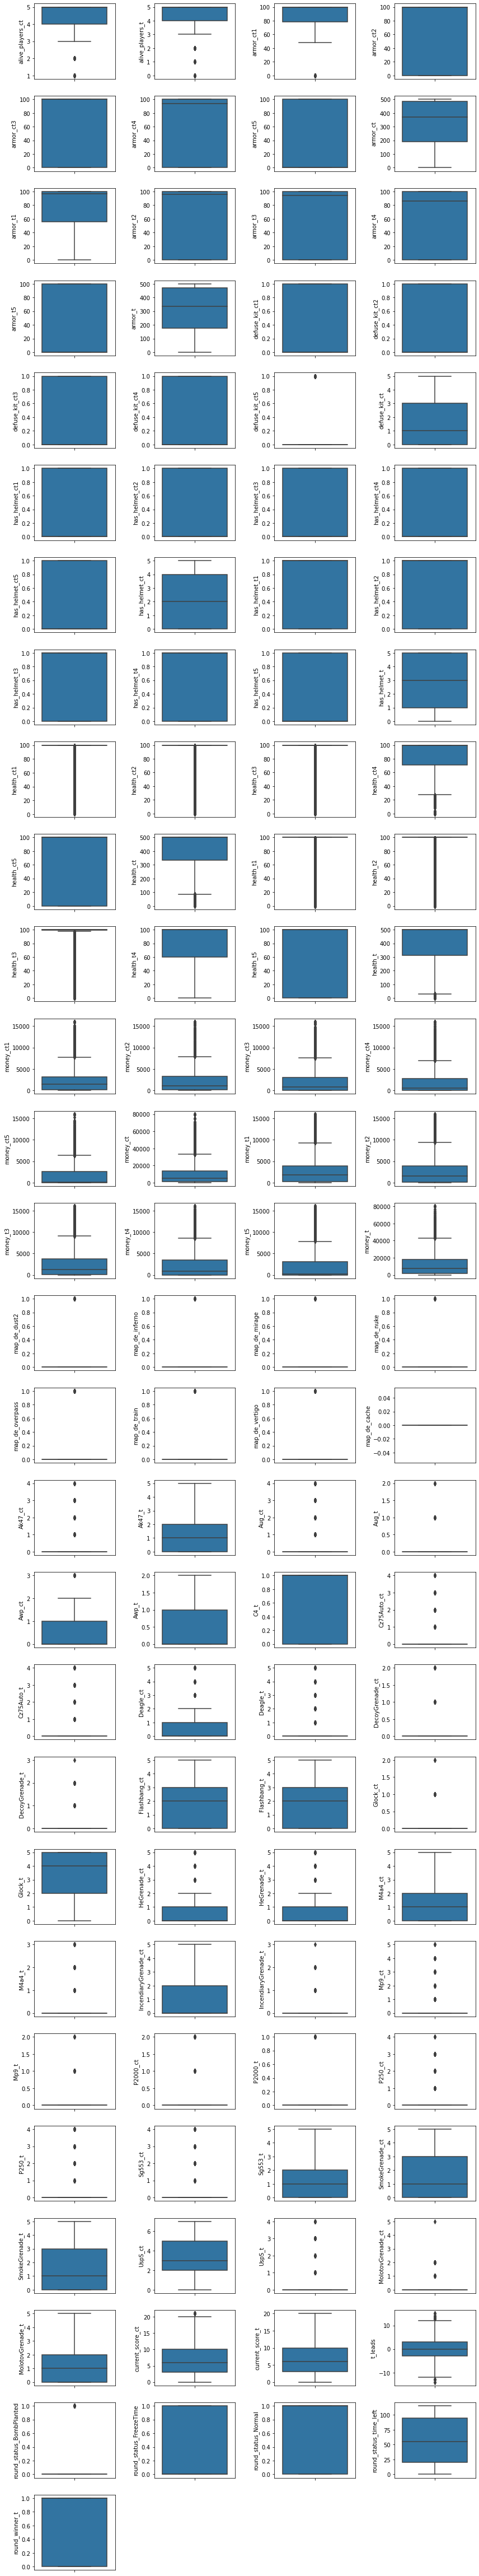

In [10]:
# Univariate Analysis: Box plots

fig = plt.figure(figsize=(12,64))
for i in range(len(df_main.columns)):
    fig.add_subplot(28,4,i+1)
    sns.boxplot(y=df_main.iloc[:,i])

plt.tight_layout()
plt.show()

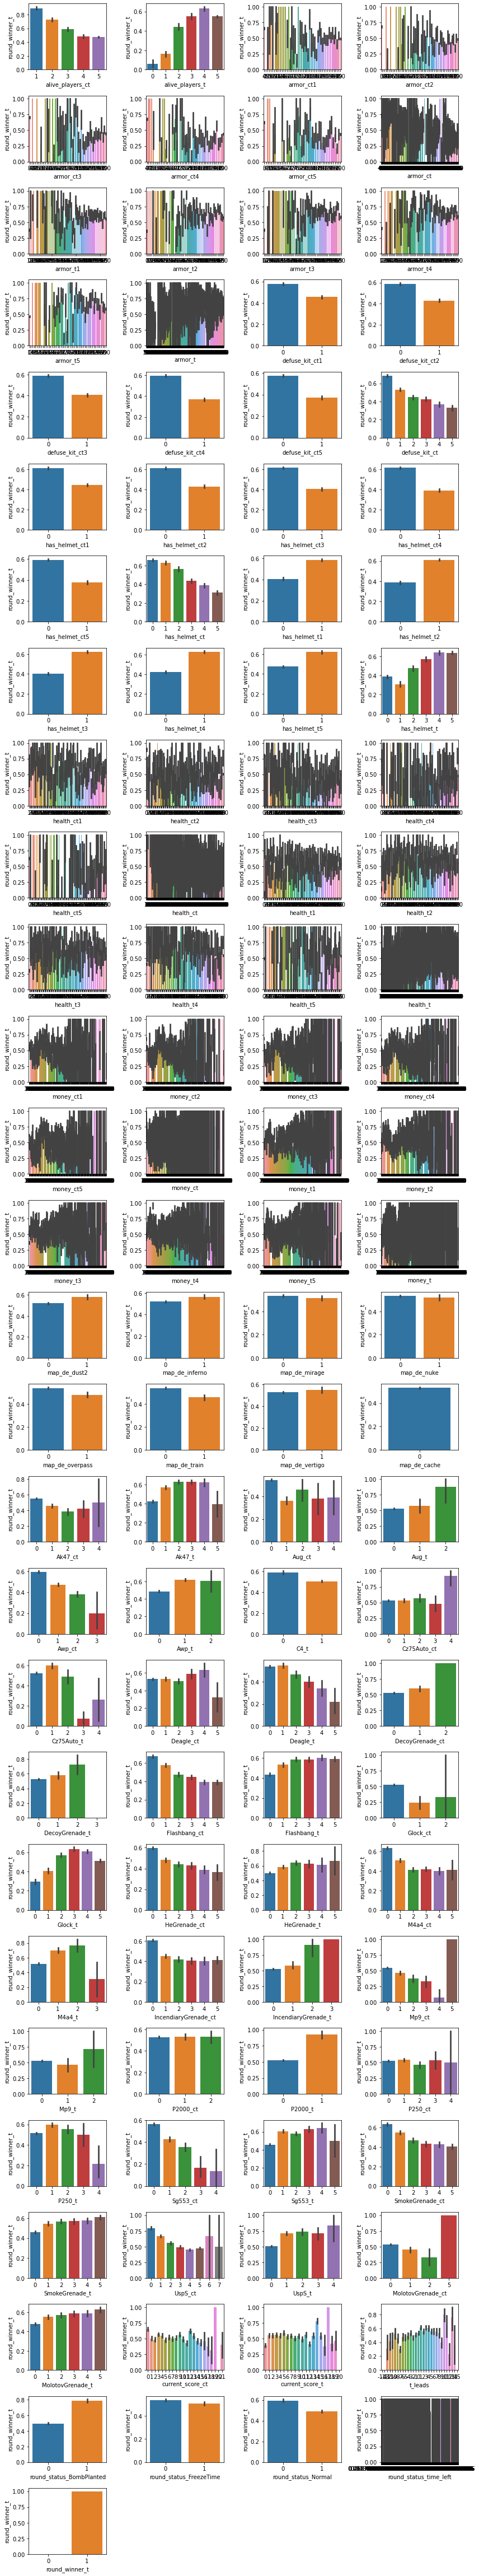

In [11]:
# Bivariate Analysis: Bar plots

fig = plt.figure(figsize=(12,64))
for i in range(len(df_main.columns)):
    fig.add_subplot(28,4,i+1)
    sns.barplot(x=df_main.iloc[:,i],y=df_main['round_winner_t'])

plt.tight_layout()
plt.show()

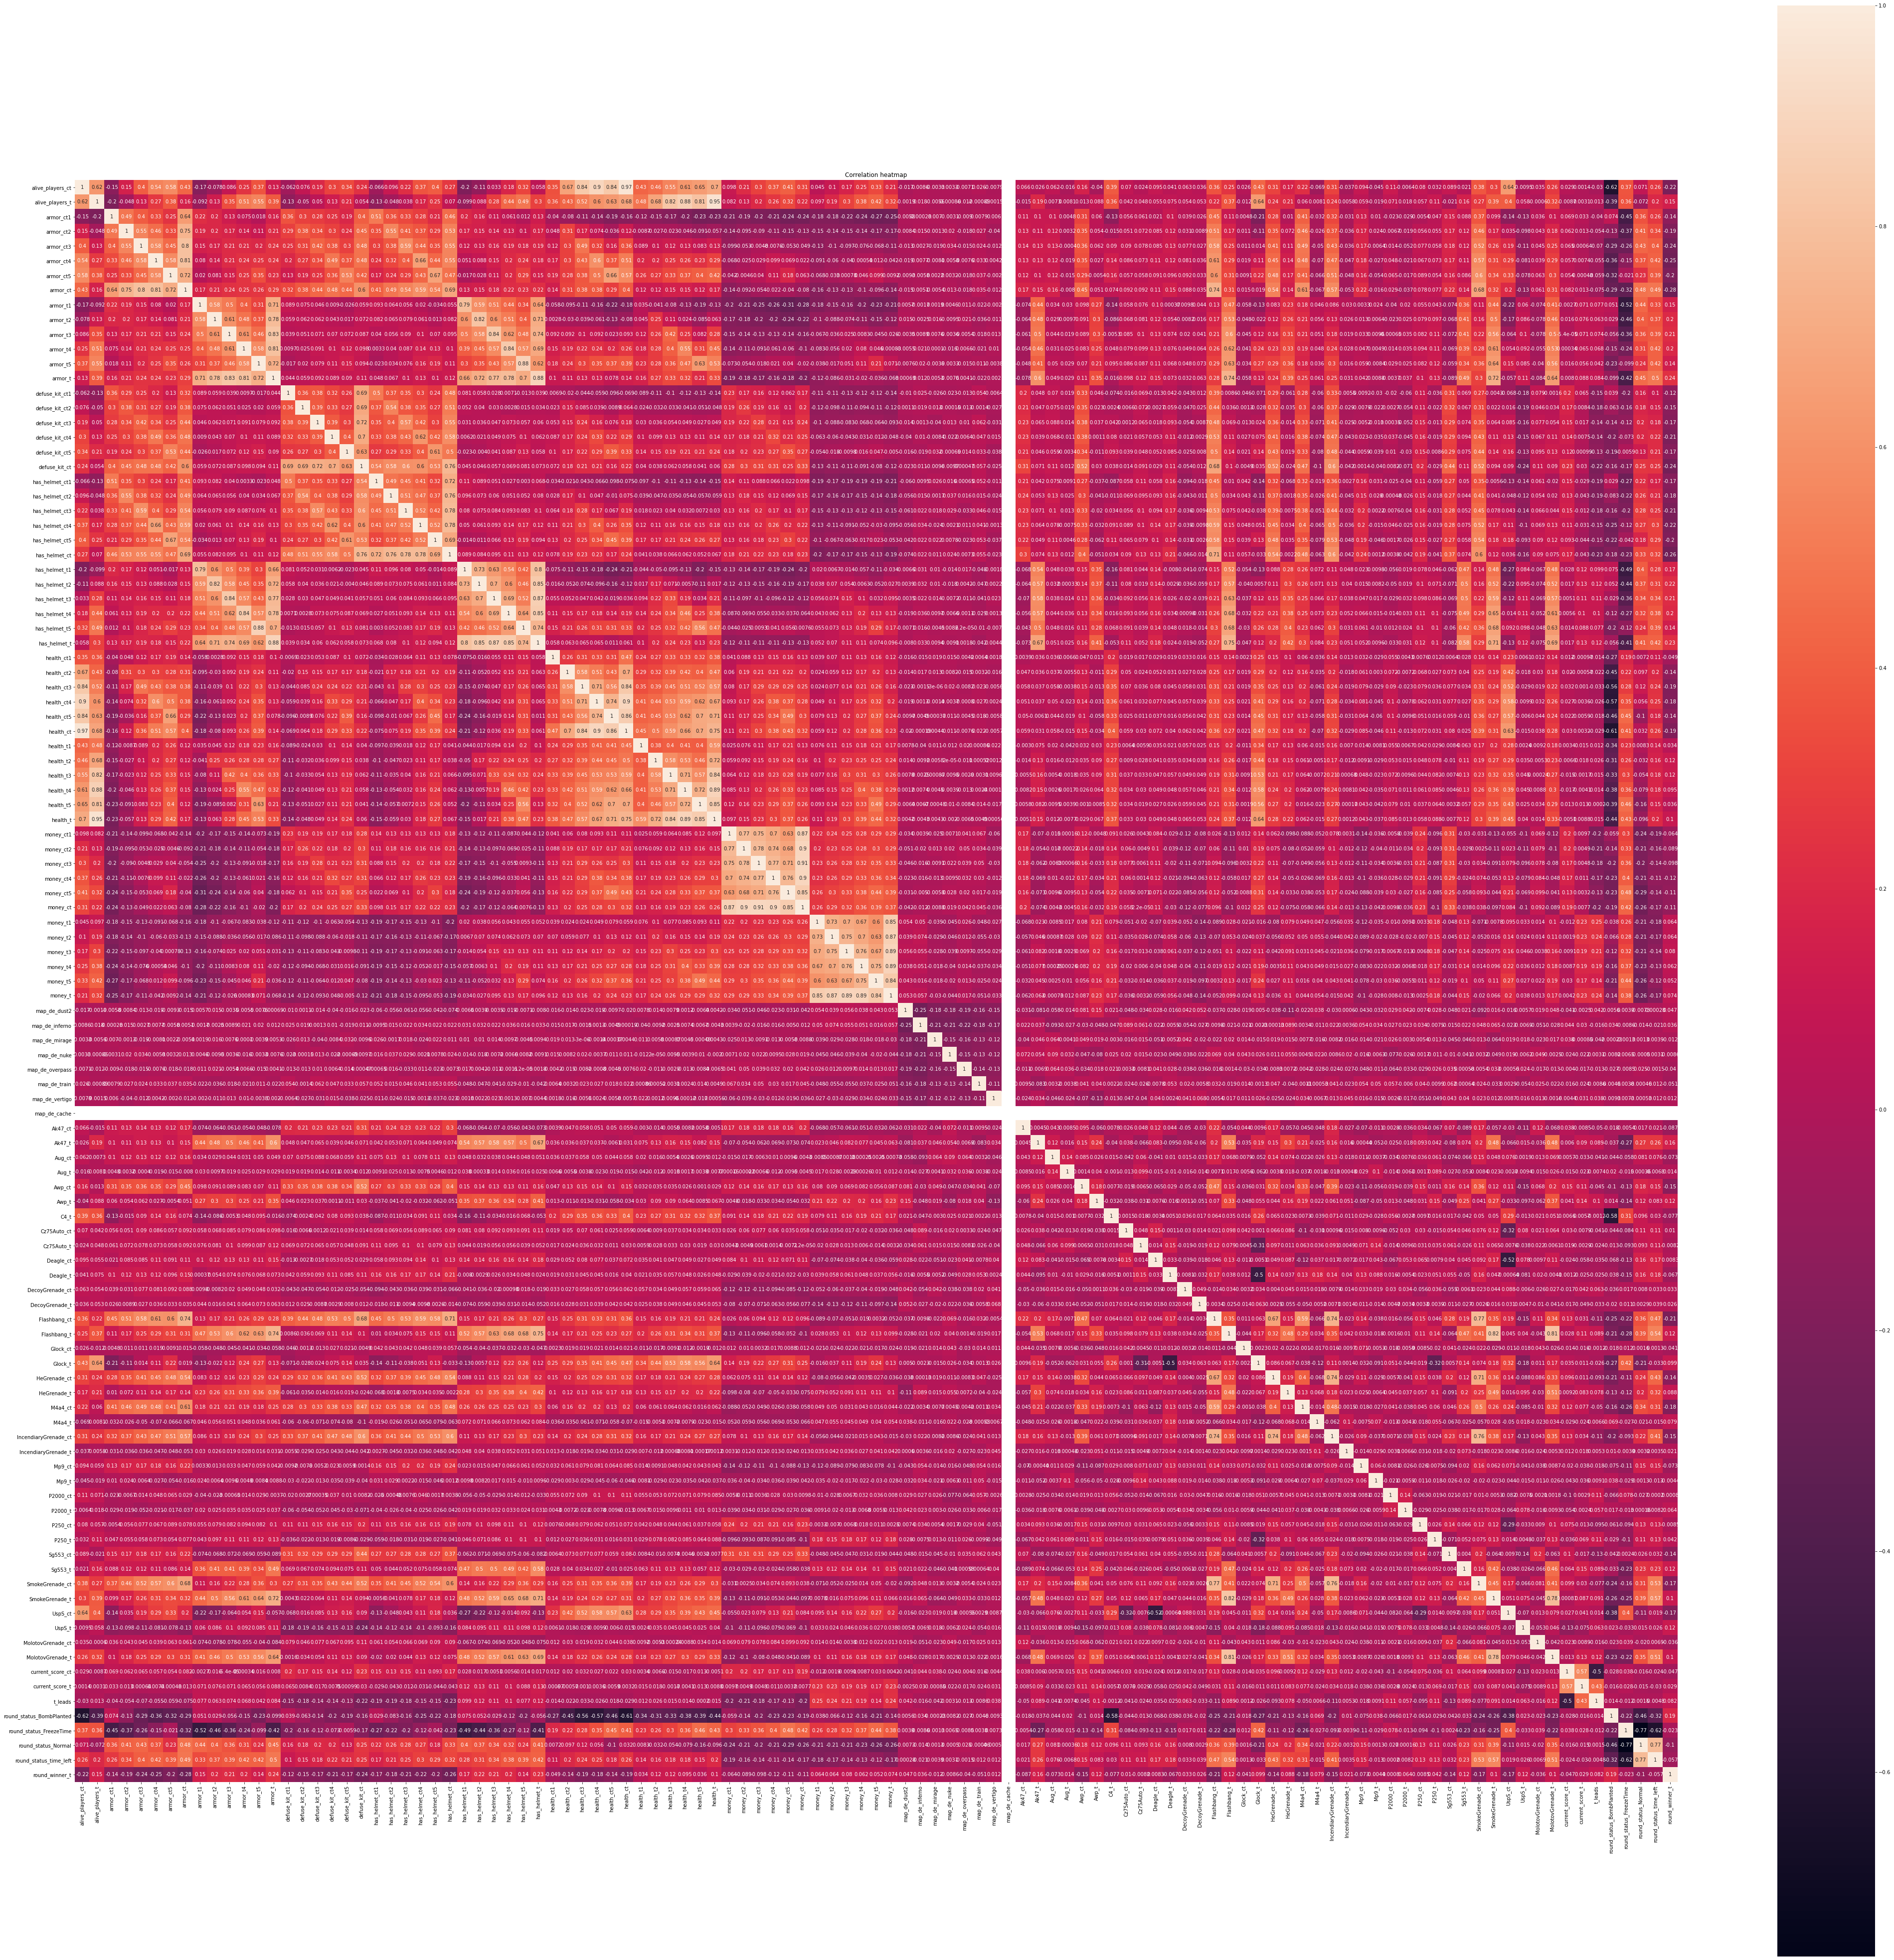

In [12]:
# Correlation heatmap
num_correlation = df_main.select_dtypes(exclude='object').corr()
plt.figure(figsize=(72,72))
plt.title('Correlation heatmap')
sns.heatmap(num_correlation, annot=True, square=True)

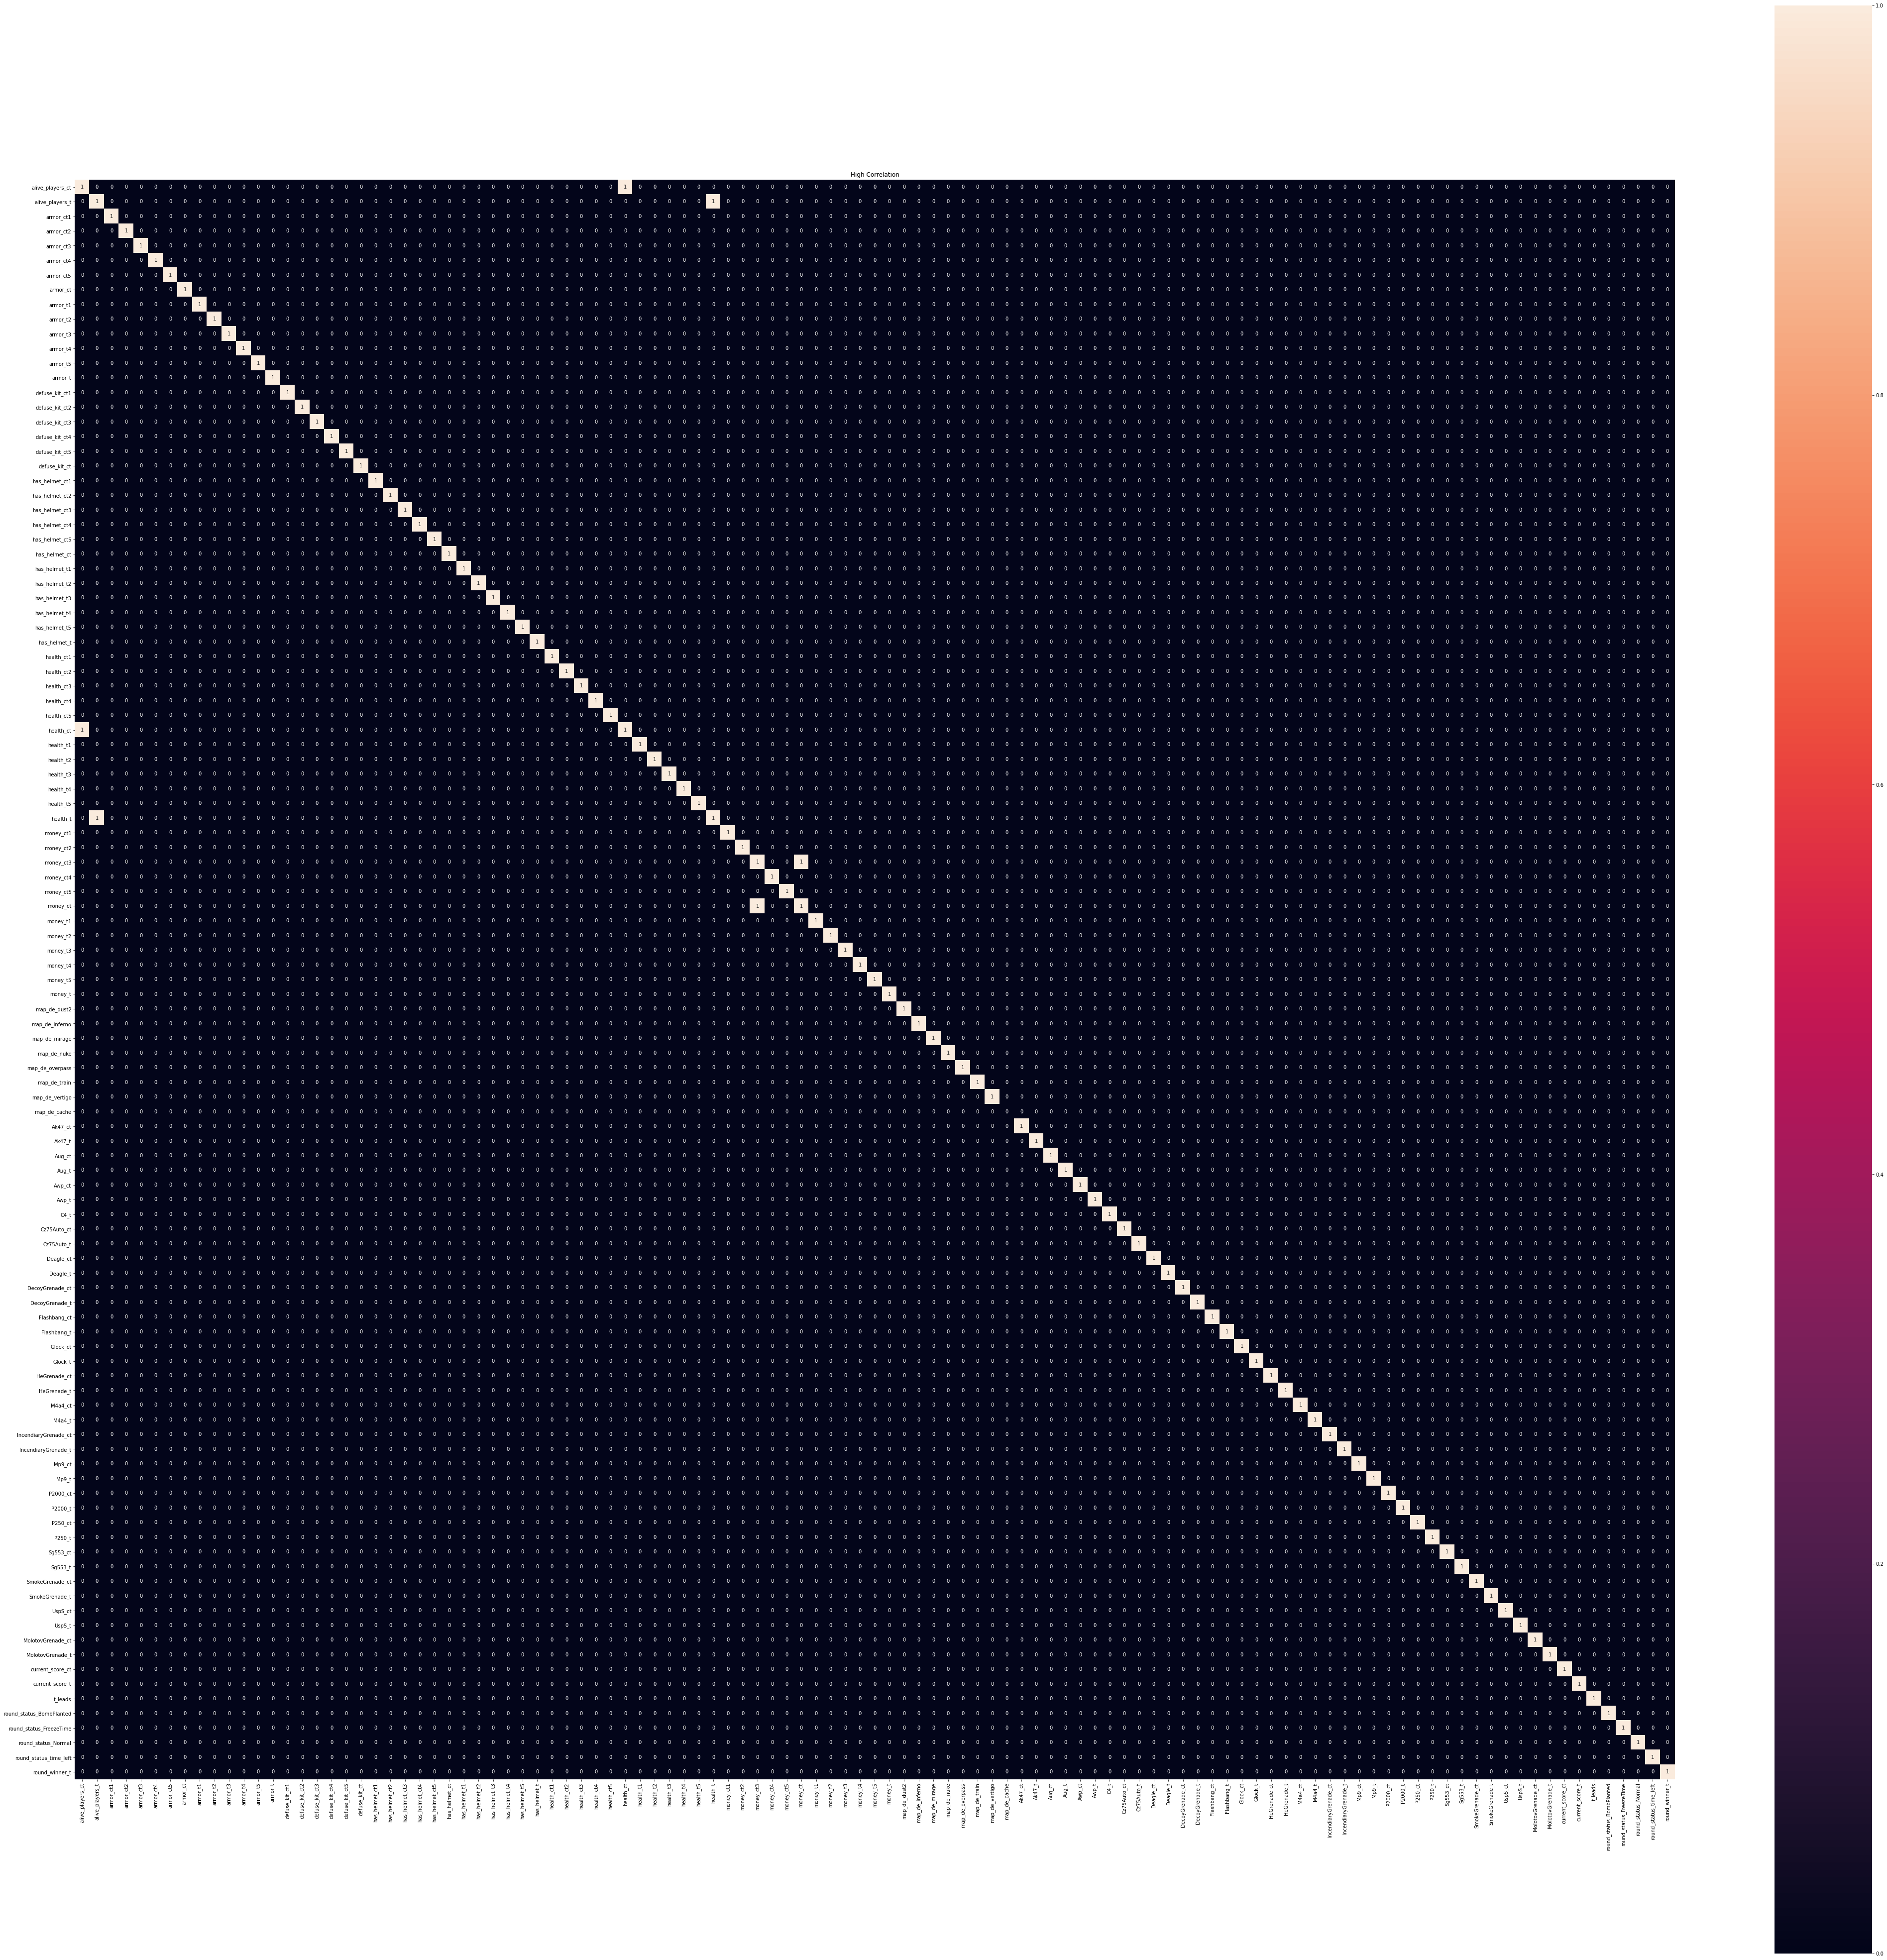

In [13]:
plt.figure(figsize=(72,72))
plt.title('High Correlation')
sns.heatmap(num_correlation > 0.9, annot=True, square=True)

In [14]:
corr = num_correlation.corr()
cdf = pd.DataFrame(pd.concat([num_correlation['round_winner_t'],corr['round_winner_t']],\
                             axis='columns'))
cdf.columns = ['corr(x)','corr(corr(x))']
cdf.sort_values(by='corr(corr(x))',axis=0,ascending=False)

corr(x)  corr(corr(x))
round_winner_t            1.000000       1.000000
UspS_t                    0.115879       0.524681
has_helmet_t3             0.214515       0.498517
Awp_t                     0.123909       0.489814
has_helmet_t2             0.216993       0.489795
has_helmet_t              0.230052       0.476406
t_leads                   0.082469       0.472555
has_helmet_t4             0.203097       0.455279
armor_t3                  0.214354       0.451208
armor_t2                  0.202614       0.439846
Ak47_t                    0.156516       0.439688
has_helmet_t1             0.167148       0.430270
armor_t                   0.235374       0.426671
Sg553_t                   0.122963       0.405092
round_status_BombPlanted  0.186580       0.392819
armor_t4                  0.199113       0.391547
armor_t1                  0.150792       0.383666
M4a4_t                    0.079330       0.371203
HeGrenade_t               0.087993       0.361332
has_helmet_t5             0.143117       0.347111
Flashbang_t               0.117144       0.330409
MolotovGrenade_t          0.100748       0.308636
SmokeGrenade_t            0.103784       0.292382
armor_t5                  0.138186       0.287151
P2000_t                   0.064353       0.244216
money_t3                  0.080144       0.237790
money_t1                  0.064266       0.228893
P250_t                    0.041748       0.228451
IncendiaryGrenade_t       0.021136       0.214753
money_t2                  0.064419       0.214174
current_score_t           0.029264       0.208941
money_t                   0.074314       0.201499
money_t4                  0.061826       0.185001
map_de_dust2              0.046620       0.159681
health_t2                 0.115848       0.124918
money_t5                  0.051918       0.120680
alive_players_t           0.148861       0.120337
health_t3                 0.122664       0.106344
Glock_t                   0.098625       0.073076
map_de_inferno            0.035502       0.070799
DecoyGrenade_ct           0.033493       0.067247
Aug_t                     0.014267       0.065120
health_t4                 0.094639       0.064014
Mp9_t                    -0.004379       0.062254
Deagle_ct                 0.008280       0.055175
map_de_vertigo            0.012273       0.051212
health_t                  0.099989       0.045774
Cz75Auto_ct               0.010052       0.023196
DecoyGrenade_t            0.025887      -0.000680
map_de_mirage            -0.011587      -0.010153
health_t1                 0.034066      -0.023201
health_t5                 0.036477      -0.028741
map_de_overpass          -0.040489      -0.038285
P2000_ct                  0.000803      -0.059985
map_de_nuke              -0.008623      -0.067987
round_status_FreezeTime  -0.023183      -0.088241
round_status_time_left   -0.057151      -0.106608
round_status_Normal      -0.101527      -0.118180
Cz75Auto_t               -0.008172      -0.135717
health_ct1               -0.049053      -0.176607
P250_ct                  -0.008516      -0.180957
Glock_ct                 -0.040769      -0.196717
map_de_train             -0.050556      -0.230881
C4_t                     -0.076521      -0.242341
money_ct1                -0.063874      -0.276216
Mp9_ct                   -0.073306      -0.277177
Aug_ct                   -0.073386      -0.277849
Deagle_t                 -0.066971      -0.293454
current_score_ct         -0.047327      -0.304352
health_ct5               -0.144776      -0.305387
money_ct5                -0.110787      -0.329739
money_ct2                -0.088870      -0.331510
money_ct                 -0.109066      -0.340206
MolotovGrenade_ct        -0.035712      -0.347602
UspS_ct                  -0.173607      -0.351949
money_ct3                -0.098329      -0.356180
health_ct                -0.192041      -0.359454
armor_ct1                -0.136917      -0.360763
health_ct4               -0.183541      -0.369198
money_ct4                -0